# CVM Indices - Breaking Distance Estimation dataset

## Loading BDE dataset and model architecture

In [1]:
from datasets import Datasets


# Load PyTorch dataloader, data scaler, dataframes of data
dataloader, scaler, fit_colnames, df_train, y_train, df_val, y_val, df_test, y_test = \
    Datasets.load_Breaking_Distance_Estimation()

In [2]:
from models import create_BDE_model, evaluate_BDE_model


# Create the neural network model for BDE
model = create_BDE_model(scaler, fit_colnames)

# Initial evaluation of the BDE model on the three datasets (train/val/test)
Xs = (df_train, df_val, df_test) ; Ys = (y_train, y_val, y_test)
evaluate_BDE_model(model, Xs, Ys)

[TRAIN] loss = 1993035.618
[VALID] loss = 1987170.383
[TEST ] loss = 1989857.499


## Fit a model (or load an existing one)

In [3]:
# from models import fit_BDE_model, save_model


# # Fit the model for 400 epochs onto training/validation data
# fit_BDE_model(model, dataloader, df_train, y_train, df_val, y_val, epochs=400)

# # Save the trained model 
# save_model(model, path='./saved_models/model_BDE_epo-400_mse-170.pt')

In [4]:
from models import load_model


# Load a previously trained model
load_model(model, path='./saved_models/model_BDE_epo-400_mse-170.pt')

In [5]:
# Evaluation of a BDE trained model on the three datasets (train/val/test)
Xs = (df_train, df_val, df_test) ; Ys = (y_train, y_val, y_test)
evaluate_BDE_model(model, Xs, Ys)

[TRAIN] loss = 172.788
[VALID] loss = 172.435
[TEST ] loss = 189.172


## Compute the CVM indices

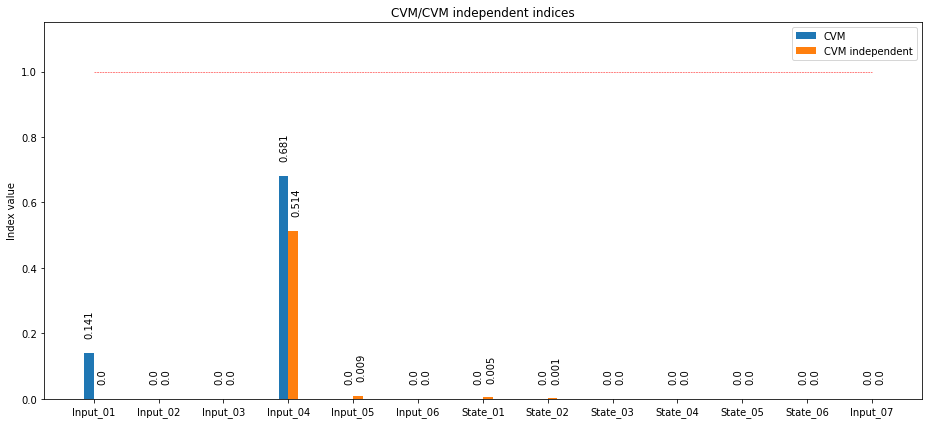

In [9]:
from methods import CVMIndices


# Compute the Cramer-Von-Mises indices on the training set
cvm_indices = CVMIndices.compute(df_train, y_train)

# Visualize the CVM indices on a dedicated barchart
CVMIndices.visualize_barcharts(cvm_indices)